MUHAMAD NURDIN_1301204025_IF 44 08

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import math 


import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [4]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Nrdn062/Machine-Learning-CaseBased1/main/audit_risk.csv')

In [9]:
df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


EXPLORATORY DATA ANALYSIS

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [11]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


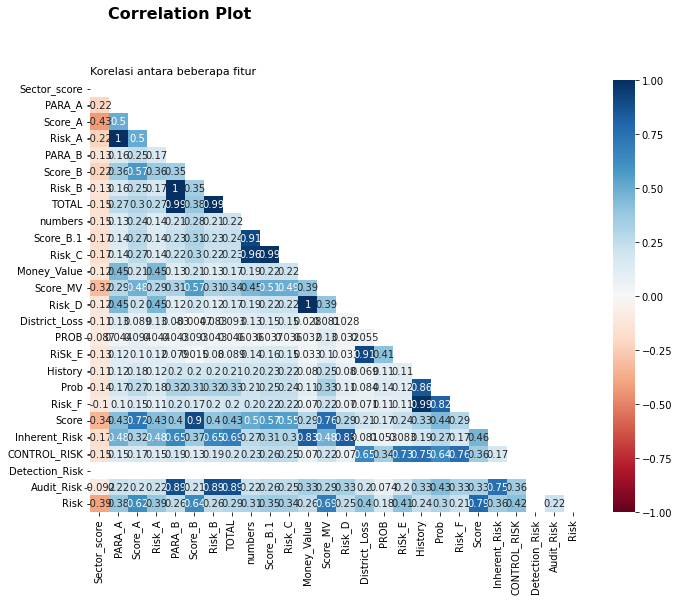

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu')

plt.suptitle("Correlation Plot", ha='left', x=0.155, y=1.04, fontsize=16, fontweight='bold')
plt.title("Korelasi antara beberapa fitur", loc='left', fontsize=11) 
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

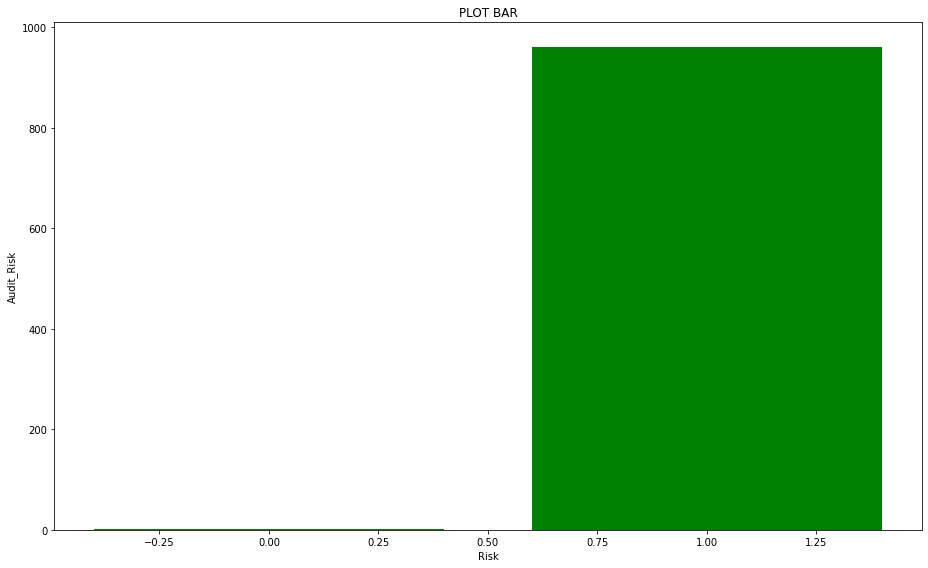

In [38]:
plt.bar(df['Risk'],df['Audit_Risk'], color='Green')
plt.title('PLOT BAR')
plt.xlabel('Risk')
plt.ylabel('Audit_Risk')
plt.show

[]

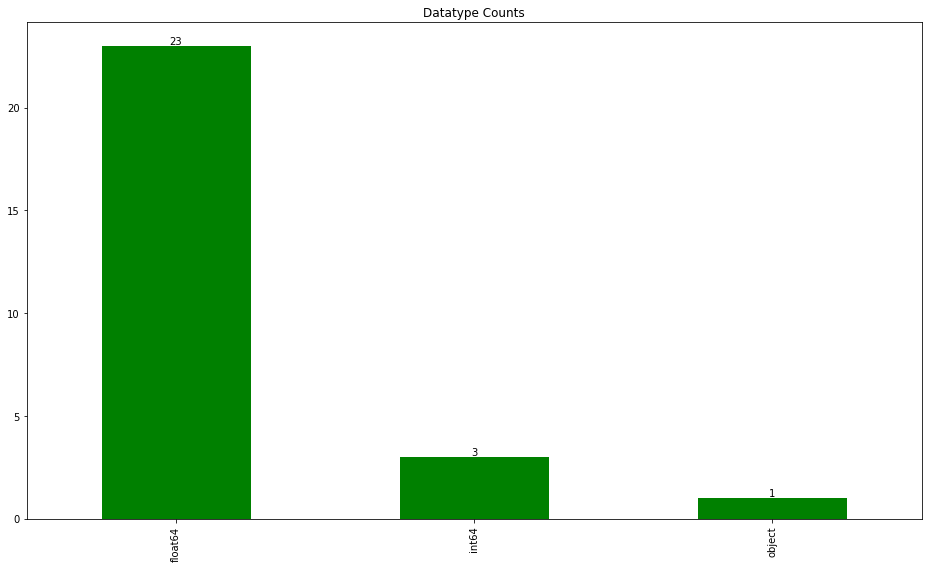

In [39]:
DataType = df.dtypes.value_counts()
DataType = DataType.plot.bar(color='Green')
DataType.bar_label(DataType.containers[0])
DataType.set_title("Datatype Counts")
DataType.plot()

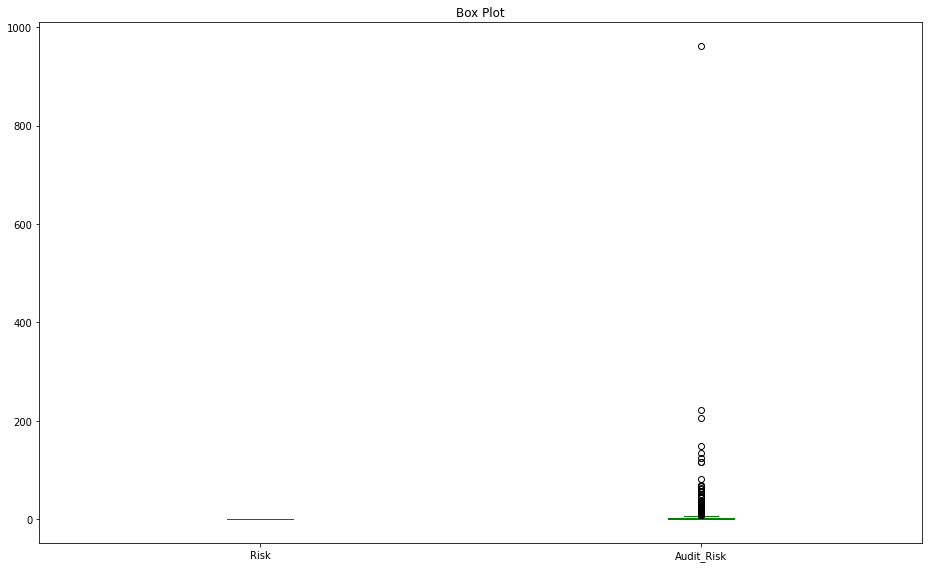

In [40]:
plt.rcParams["figure.figsize"] = [13,8]
plt.rcParams["figure.autolayout"] = True
ax = df[['Risk','Audit_Risk']].plot(kind='box',title='Box Plot',color='Green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Risk', ylabel='count'>

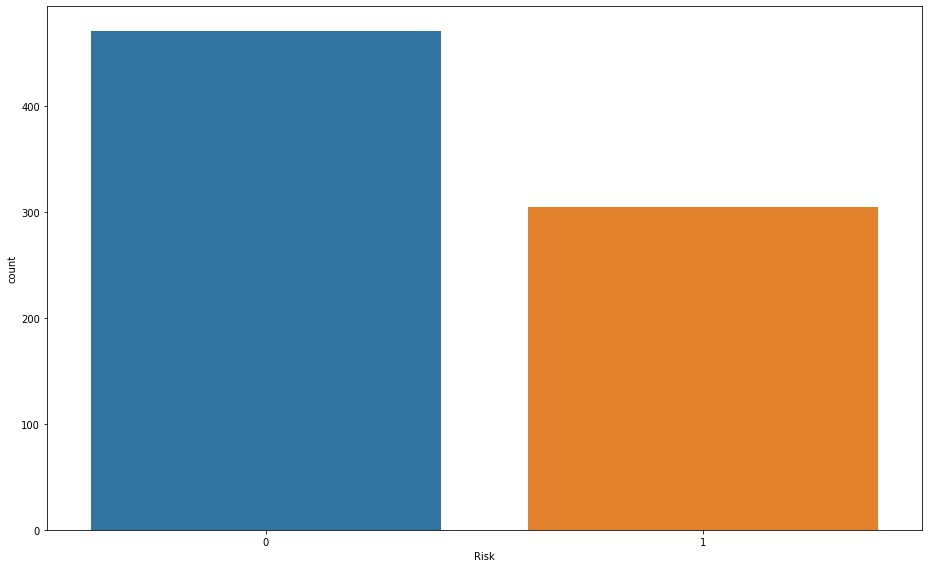

In [37]:
sns.countplot(df['Risk'], label = "Count")